In [1]:
#Dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import operator

In [2]:
# Load in file
olympic_data = "olympic_data.csv"

In [3]:
# Read and display the CSV with Pandas
olympic_data_df = pd.read_csv(olympic_data)
olympic_data_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Stockholm,1912,G,Hannes KOLEHMAINEN,FIN,31:20.8
1,M,10000M Men,Stockholm,1912,S,Lewis TEWANIMA,USA,32:06.6
2,M,10000M Men,Stockholm,1912,B,Albin STENROOS,FIN,32:21.8
3,M,10000M Men,Antwerp,1920,G,Paavo NURMI,FIN,31:45.8
4,M,10000M Men,Antwerp,1920,S,Joseph GUILLEMOT,FRA,31:47.2


In [4]:
# Create individual dataframes for each events
m_highjump_df = olympic_data_df.loc[olympic_data_df["Event"] == "High Jump Men"]
w_highjump_df = olympic_data_df.loc[olympic_data_df["Event"] == "High Jump Women"]
m_discus_df = olympic_data_df.loc[olympic_data_df["Event"] == "Discus Throw Men"]
w_discus_df = olympic_data_df.loc[olympic_data_df["Event"] == "Discus Throw Women"]
m_100_df = olympic_data_df.loc[olympic_data_df["Event"] == "100M Men"]
w_100_df = olympic_data_df.loc[olympic_data_df["Event"] == "100M Women"]
m_10000_df = olympic_data_df.loc[olympic_data_df["Event"] == "10000M Men"]
w_10000_df = olympic_data_df.loc[olympic_data_df["Event"] == "10000M Women"]
m_800_df = olympic_data_df.loc[olympic_data_df["Event"] == "800M Men"]
w_800_df = olympic_data_df.loc[olympic_data_df["Event"] == "800M Women"]


<ipython-input-5-76e581858b06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_highjump_df["Result"] = m_highjump_df["Result"].map(lambda x:float(x))


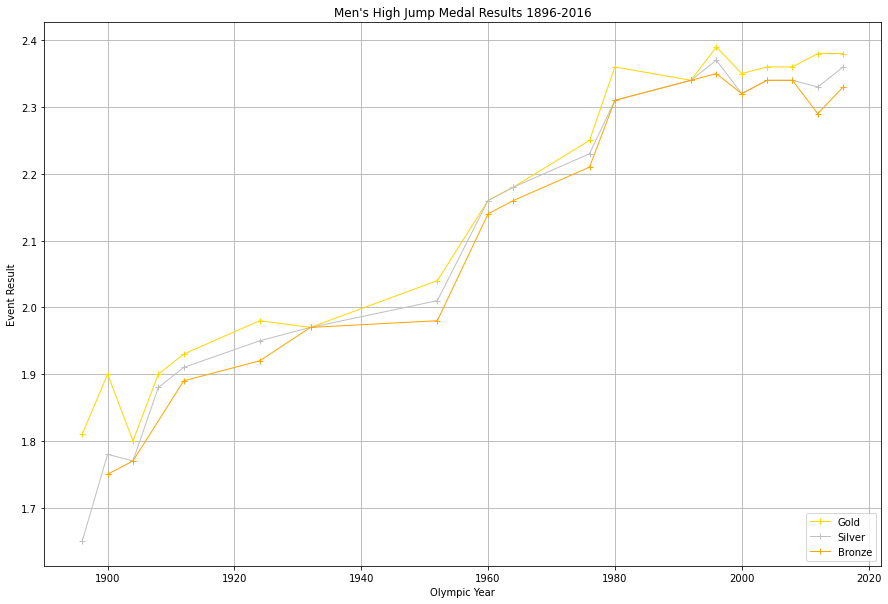

In [5]:
# Plot the results for Mens High Jump
#Change result value into numberic value using lambda and then group by year
m_highjump_df["Result"] = m_highjump_df["Result"].map(lambda x:float(x))
m_highjump_gb = m_highjump_df.groupby(['Year',"Medal"])["Result"].mean()

#Create dataframe to plot and reset index then create dataframes for each medal
m_highjump_plt_df = pd.DataFrame(m_highjump_gb).reset_index()
mhj_gold_df = m_highjump_plt_df.loc[m_highjump_plt_df["Medal"]=="G",["Year", "Result"]]
mhj_silver_df = m_highjump_plt_df.loc[m_highjump_plt_df["Medal"]=="S",["Year", "Result"]]
mhj_bronze_df = m_highjump_plt_df.loc[m_highjump_plt_df["Medal"]=="B",["Year", "Result"]]

#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(mhj_gold_df["Year"], mhj_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(mhj_silver_df["Year"], mhj_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(mhj_bronze_df["Year"], mhj_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Men's High Jump Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Men's High Jump Medal Results 1896-2016.png")
plt.show()

<ipython-input-6-eba31414d3be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_highjump_df["Result"] = w_highjump_df["Result"].map(lambda x:float(x))


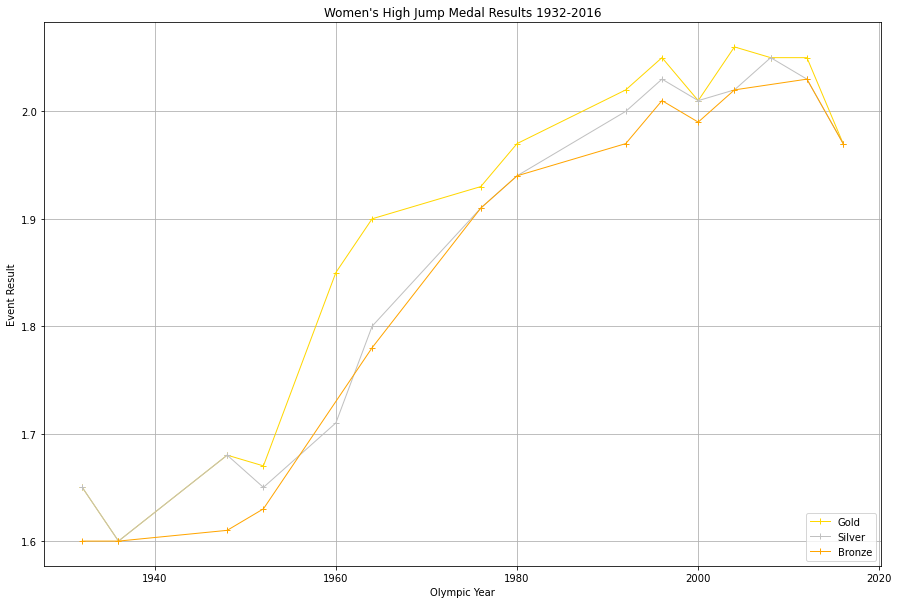

In [6]:
# Plot the results for Womens High Jump
#Change result value into numberic value using lambda and then group by year
w_highjump_df["Result"] = w_highjump_df["Result"].map(lambda x:float(x))
w_highjump_gb = w_highjump_df.groupby(['Year',"Medal"])["Result"].mean()

#Create dataframe to plot and reset index then create dataframes for each medal
w_highjump_plt_df = pd.DataFrame(w_highjump_gb).reset_index()
whj_gold_df = w_highjump_plt_df.loc[w_highjump_plt_df["Medal"]=="G",["Year", "Result"]]
whj_silver_df = w_highjump_plt_df.loc[w_highjump_plt_df["Medal"]=="S",["Year", "Result"]]
whj_bronze_df = w_highjump_plt_df.loc[w_highjump_plt_df["Medal"]=="B",["Year", "Result"]]

#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(whj_gold_df["Year"], whj_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(whj_silver_df["Year"], whj_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(whj_bronze_df["Year"], whj_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Women's High Jump Medal Results 1932-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
#plt.savefig("Output/Women's High Jump Medal Results 1932-2016.png")
plt.show()

In [7]:
# Plot the results for Mens Discus
#Change result value into numberic value using lambda and then group by year
m_discus_df["Result"] = m_discus_df["Result"].map(lambda x:float(x))
m_discus_gb = m_discus_df.groupby(['Year',"Medal"])["Result"].mean()

<ipython-input-7-e35549f1ebdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_discus_df["Result"] = m_discus_df["Result"].map(lambda x:float(x))


In [8]:
#Create dataframe to plot and reset index then create dataframes for each medal
m_discus_plt_df = pd.DataFrame(m_discus_gb).reset_index()
md_gold_df = m_discus_plt_df.loc[m_discus_plt_df["Medal"]=="G",["Year", "Result"]]
md_silver_df = m_discus_plt_df.loc[m_discus_plt_df["Medal"]=="S",["Year", "Result"]]
md_bronze_df = m_discus_plt_df.loc[m_discus_plt_df["Medal"]=="B",["Year", "Result"]]

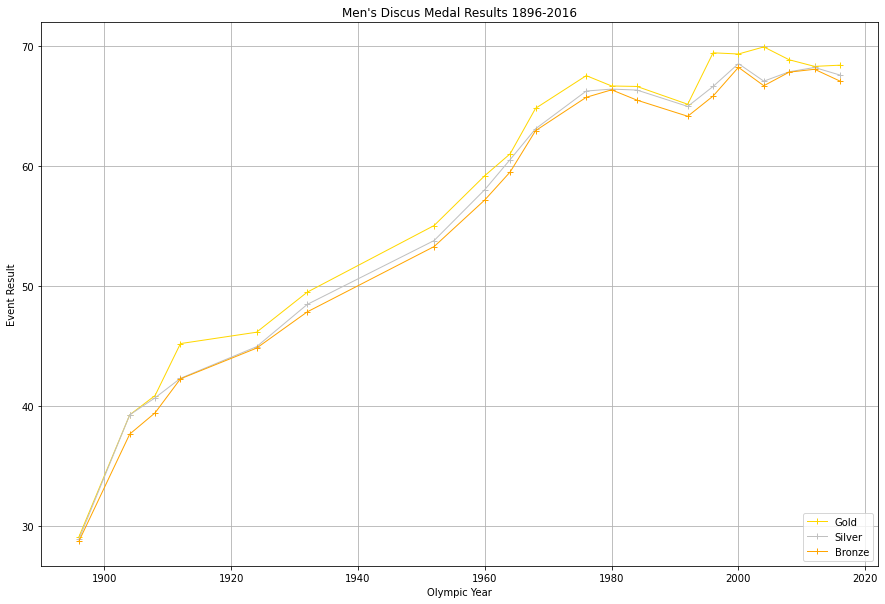

In [9]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(md_gold_df["Year"], md_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(md_silver_df["Year"], md_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(md_bronze_df["Year"], md_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Men's Discus Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Men's Discus Medal Results 1896-2016.png")
plt.show()

In [10]:
# Plot the results for Mens Discus
#Change result value into numberic value using lambda and then group by year
w_discus_df["Result"] = w_discus_df["Result"].map(lambda x:float(x))
w_discus_gb = w_discus_df.groupby(['Year',"Medal"])["Result"].mean()

<ipython-input-10-a59488599613>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_discus_df["Result"] = w_discus_df["Result"].map(lambda x:float(x))


In [11]:
#Create dataframe to plot and reset index then create dataframes for each medal
w_discus_plt_df = pd.DataFrame(w_discus_gb).reset_index()
wd_gold_df = w_discus_plt_df.loc[w_discus_plt_df["Medal"]=="G",["Year", "Result"]]
wd_silver_df = w_discus_plt_df.loc[w_discus_plt_df["Medal"]=="S",["Year", "Result"]]
wd_bronze_df = w_discus_plt_df.loc[w_discus_plt_df["Medal"]=="B",["Year", "Result"]]

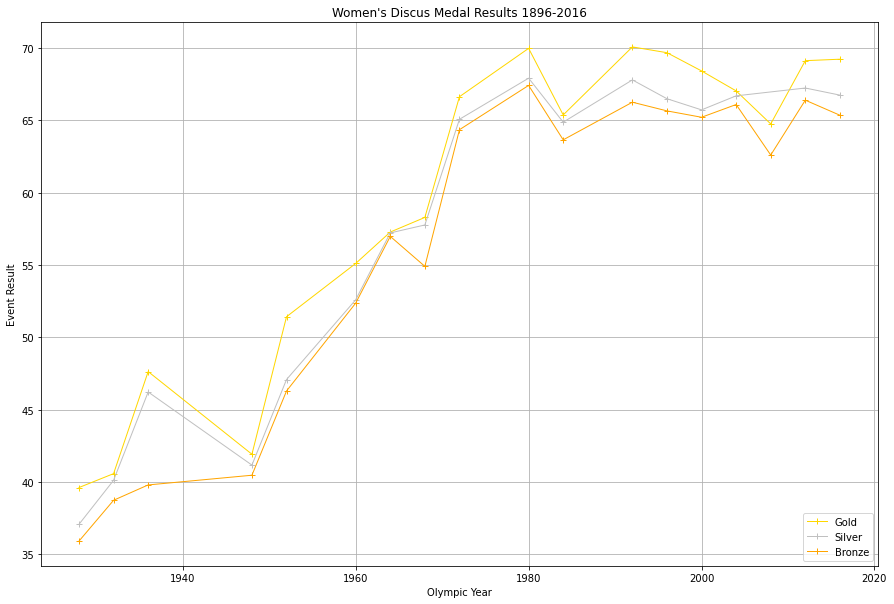

In [12]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(wd_gold_df["Year"], wd_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(wd_silver_df["Year"], wd_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(wd_bronze_df["Year"], wd_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Women's Discus Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Women's Discus Medal Results 1896-2016.png")
plt.show()

In [13]:
# Plot the results for Mens 100M
#Change result value into numberic value using lambda and then group by year
m_100_df["Result"] = m_100_df["Result"].map(lambda x:float(x))
m_100_gb = m_100_df.groupby(['Year',"Medal"])["Result"].mean()

<ipython-input-13-5addd3622ca7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_100_df["Result"] = m_100_df["Result"].map(lambda x:float(x))


In [14]:
#Create dataframe to plot and reset index then create dataframes for each medal
m_100_plt_df = pd.DataFrame(m_100_gb).reset_index()
m100_gold_df = m_100_plt_df.loc[m_100_plt_df["Medal"]=="G",["Year", "Result"]]
m100_silver_df = m_100_plt_df.loc[m_100_plt_df["Medal"]=="S",["Year", "Result"]]
m100_bronze_df = m_100_plt_df.loc[m_100_plt_df["Medal"]=="B",["Year", "Result"]]



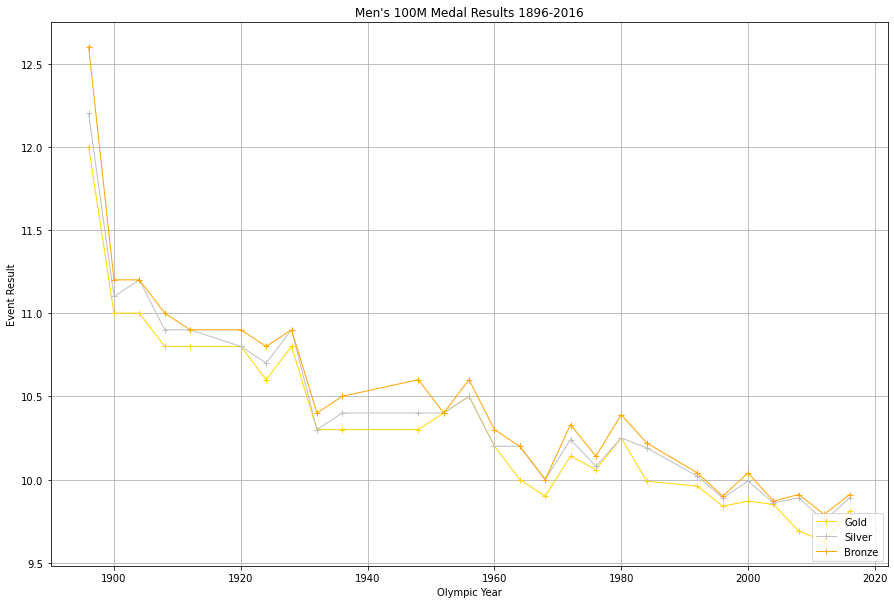

In [15]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(m100_gold_df["Year"], m100_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(m100_silver_df["Year"], m100_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(m100_bronze_df["Year"], m100_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Men's 100M Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Men's 100M Medal Results 1896-2016.png")
plt.show()

In [16]:
# Plot the results for Womens 100M
#Change result value into numberic value using lambda and then group by year
w_100_df["Result"] = w_100_df["Result"].map(lambda x:float(x))
w_100_gb = w_100_df.groupby(['Year',"Medal"])["Result"].mean()

<ipython-input-16-ef80f9ef83c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_100_df["Result"] = w_100_df["Result"].map(lambda x:float(x))


In [17]:
#Create dataframe to plot and reset index then create dataframes for each medal
w_100_plt_df = pd.DataFrame(w_100_gb).reset_index()
w100_gold_df = w_100_plt_df.loc[w_100_plt_df["Medal"]=="G",["Year", "Result"]]
w100_silver_df = w_100_plt_df.loc[w_100_plt_df["Medal"]=="S",["Year", "Result"]]
w100_bronze_df = w_100_plt_df.loc[w_100_plt_df["Medal"]=="B",["Year", "Result"]]

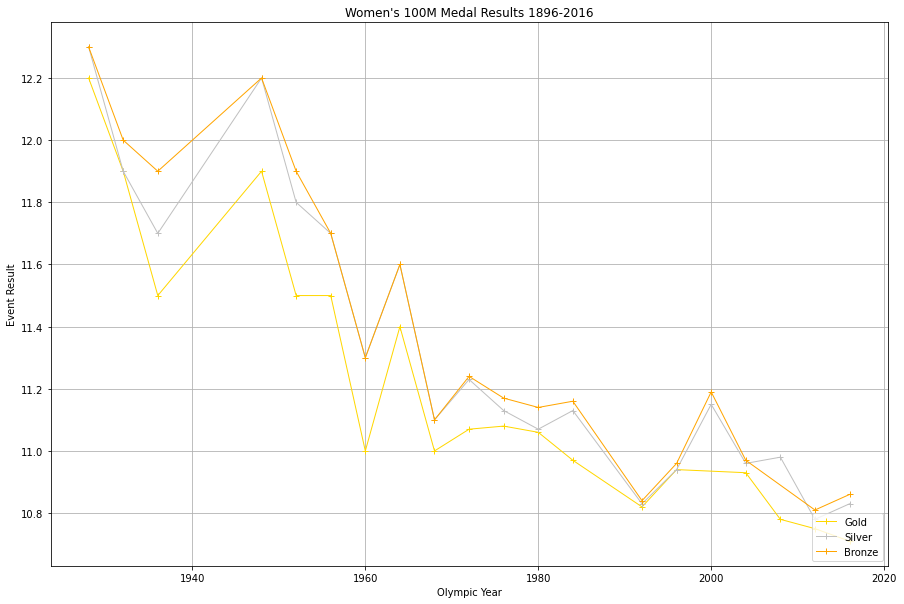

In [18]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(w100_gold_df["Year"], w100_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(w100_silver_df["Year"], w100_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(w100_bronze_df["Year"], w100_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Women's 100M Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Women's 100M Medal Results 1896-2016.png")
plt.show()

In [19]:
# Plot the results for Mens 10000M
#Change result value into numberic value using lambda and then group by year
m_10000_df["Result"] = m_10000_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))
m_10000_gb = m_10000_df.groupby(['Year',"Medal"])["Result"].mean()



<ipython-input-19-43b23c14107b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_10000_df["Result"] = m_10000_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))


In [20]:
#Create dataframe to plot and reset index then create dataframes for each medal
m_10000_plt_df = pd.DataFrame(m_10000_gb).reset_index()
m10000_gold_df = m_10000_plt_df.loc[m_10000_plt_df["Medal"]=="G",["Year", "Result"]]
m10000_silver_df = m_10000_plt_df.loc[m_10000_plt_df["Medal"]=="S",["Year", "Result"]]
m10000_bronze_df = m_10000_plt_df.loc[m_10000_plt_df["Medal"]=="B",["Year", "Result"]]

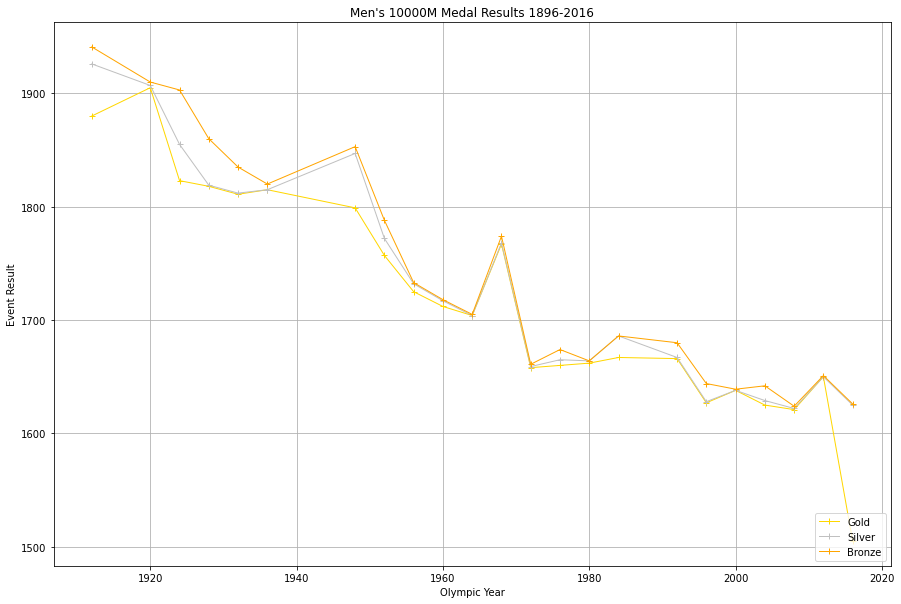

In [21]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(m10000_gold_df["Year"], m10000_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(m10000_silver_df["Year"], m10000_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(m10000_bronze_df["Year"], m10000_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Men's 10000M Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Men's 10000M Medal Results 1896-2016.png")
plt.show()

In [22]:
# Plot the results for Womens 10000M
#Change result value into numberic value using lambda and then group by year
w_10000_df["Result"] = w_10000_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))
w_10000_gb = w_10000_df.groupby(['Year',"Medal"])["Result"].mean()



<ipython-input-22-1d3384b6ac2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_10000_df["Result"] = w_10000_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))


In [23]:
#Create dataframe to plot and reset index then create dataframes for each medal
w_10000_plt_df = pd.DataFrame(w_10000_gb).reset_index()
w10000_gold_df = w_10000_plt_df.loc[w_10000_plt_df["Medal"]=="G",["Year", "Result"]]
w10000_silver_df = w_10000_plt_df.loc[w_10000_plt_df["Medal"]=="S",["Year", "Result"]]
w10000_bronze_df = w_10000_plt_df.loc[w_10000_plt_df["Medal"]=="B",["Year", "Result"]]



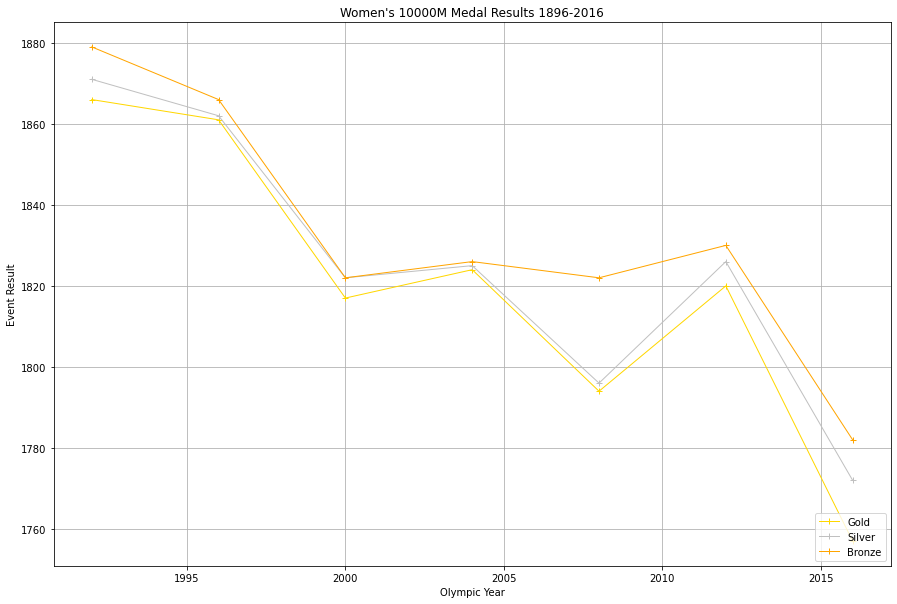

In [24]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(w10000_gold_df["Year"], w10000_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(w10000_silver_df["Year"], w10000_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(w10000_bronze_df["Year"], w10000_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Women's 10000M Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Women's 10000M Medal Results 1896-2016.png")
plt.show()

In [25]:
# Plot the results for Mens 800M
#Change result value into numberic value using lambda and then group by year
m_800_df["Result2"] = m_800_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))
m_800_gb = m_800_df.groupby(['Year',"Medal"])["Result2"].mean()

<ipython-input-25-fa50abb54c18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_800_df["Result2"] = m_800_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))


In [26]:
#Create dataframe to plot and reset index then create dataframes for each medal
m_800_plt_df = pd.DataFrame(m_800_gb).reset_index()
m800_gold_df = m_800_plt_df.loc[m_800_plt_df["Medal"]=="G",["Year", "Result2"]]
m800_silver_df = m_800_plt_df.loc[m_800_plt_df["Medal"]=="S",["Year", "Result2"]]
m800_bronze_df = m_800_plt_df.loc[m_800_plt_df["Medal"]=="B",["Year", "Result2"]]

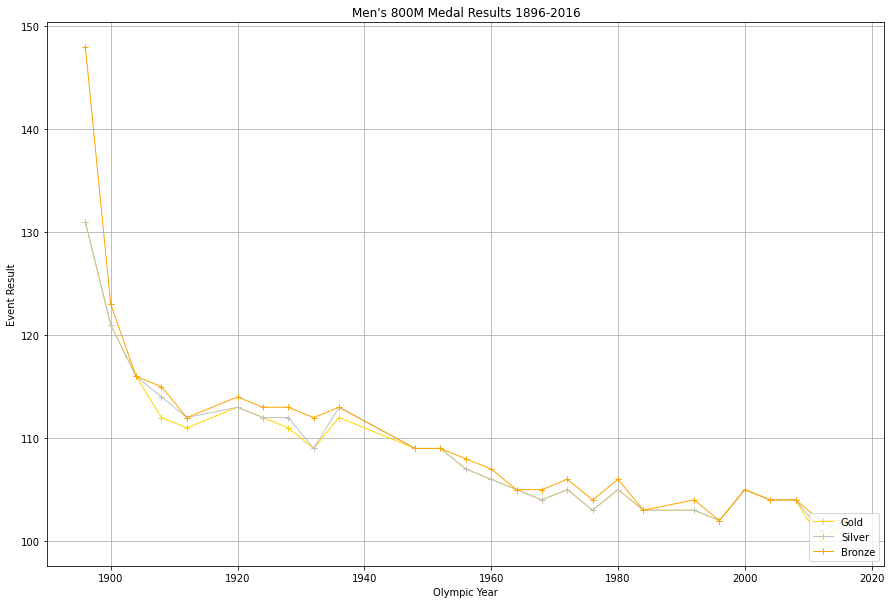

In [27]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(m800_gold_df["Year"], m800_gold_df["Result2"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(m800_silver_df["Year"], m800_silver_df["Result2"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(m800_bronze_df["Year"], m800_bronze_df["Result2"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Men's 800M Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Men's 800M Medal Results 1896-2016.png")
plt.show()

In [28]:
# Plot the results for Womens 800M
#Change result value into numberic value using lambda and then group by year
w_800_df["Result"] = w_800_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))
w_800_gb = w_800_df.groupby(['Year',"Medal"])["Result"].mean()

<ipython-input-28-3139a2b9b8e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_800_df["Result"] = w_800_df["Result"].map(lambda x:(int(x[0:2])*60)+(int(x[3:5])))


In [29]:
#Create dataframe to plot and reset index then create dataframes for each medal
w_800_plt_df = pd.DataFrame(w_800_gb).reset_index()
w800_gold_df = w_800_plt_df.loc[w_800_plt_df["Medal"]=="G",["Year", "Result"]]
w800_silver_df = w_800_plt_df.loc[w_800_plt_df["Medal"]=="S",["Year", "Result"]]
w800_bronze_df = w_800_plt_df.loc[w_800_plt_df["Medal"]=="B",["Year", "Result"]]

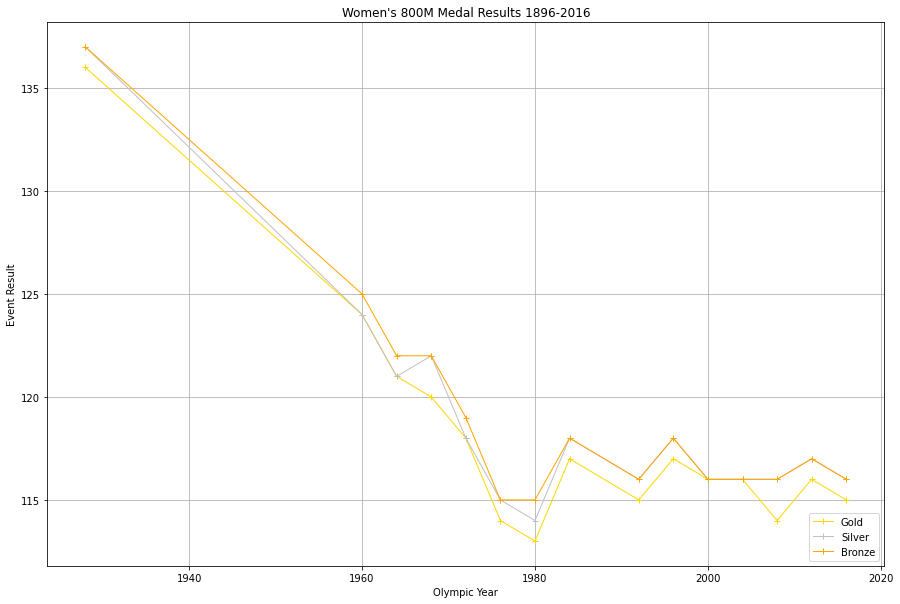

In [30]:
#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(w800_gold_df["Year"], w800_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(w800_silver_df["Year"], w800_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(w800_bronze_df["Year"], w800_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Women's 800M Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Women's 800M Medal Results 1896-2016.png")
plt.show()